# Multi-class prediction problem             
## Problem Statement                                 
>>1) Build and submit a deep learning based Image classification model on 100 scrapped Images (for each category) from     amazon for the below categories :         
>>1) Sarees (women) (100 images)                    
>>2) Tshirts (men) (100 images)                 
>>3) Shirts (men) (100 images)                
                
## Features:                                         
>>Used all the following optimisers:                        
>>1) SGD + Momentum                    
>>2) Nesterov Accelerated Gradient Descent                                                       
>>3) RMSprop                   
>>4) Adam                      
>>5) Nadam                        
>>Trained the model for different learning rates and different callbacks and thgen displaying the result.            

## Data:                
>>1) Data is scrapped from amazon website for the above defined categories.           
>>2) It is also available at: https://github.com/ShubhSaini/Deep_Learning/tree/master/Assignment_2_Amazon_images/Dataset  

## Importing Libraries

In [1]:
# Importing Useful Libraries

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from keras.models import load_model
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

import os
from os import listdir
import cv2
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

# Loading Directories

In [2]:
# Loading Train directory
train_data_dir='./Garments/train'

# Loading Test Directory
validation_data_dir='./Garments/test'


# Loading Some Scrapped Image Samples

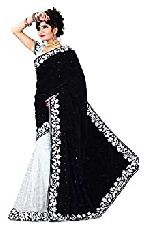

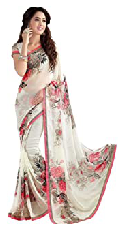

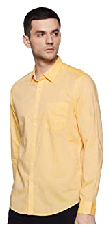

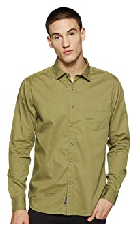

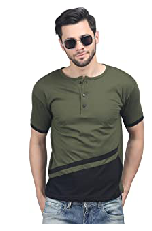

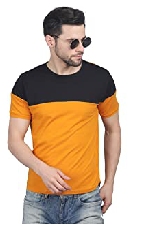

In [3]:
# Sample images which I have scrapped from amazon
import matplotlib.image as mpimg
Saree_train='./Garments/train/Saree'
Shirt_train='./Garments/train/Shirt'
Tshirt_train='./Garments/train/Tshirt'

Dir_train=[Saree_train, Shirt_train, Tshirt_train]
for dirs in Dir_train:
    k=listdir(dirs)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Data Augmentation

In [4]:
# Performing Data Augmentation using OpenCV on the scrapped images

for dirs in Dir_train:
    
    if dirs==Saree_train:
        print("\nPerforming Augmentation operations on Saree images\n")
    elif dirs==Tshirt_train:
        print("\nPerforming Augmentation operations on Tshirt images \n")
    elif dirs==Shirt_train:
        print("\nPerforming Augmentation operations on Shirt images\n")
        
    for i in listdir(dirs):
        print("Input Image is: ",i)
        input_image=cv2.imread('{}/{}'.format(dirs,i))
        input_image = cv2.resize(input_image, (320, 320), interpolation = cv2.INTER_AREA)
        print("Shape of the image is: ",input_image.shape)
        
        # Splitting up the filename
        fold=i.split('_')
        
        # Rotating images
        height,width=input_image.shape[:2]
        rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),30,.5)
        rotated_image=cv2.warpAffine(input_image,rotation_matrix,(width,height))
        
        # Deciding folder to save the image
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_Rot.jpg'.format(i),rotated_image)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_Rot.jpg'.format(i),rotated_image)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_Rot.jpg'.format(i),rotated_image)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_Rot.jpg'.format(i),rotated_image)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_Rot.jpg'.format(i),rotated_image)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_Rot.jpg'.format(i),rotated_image)
    
        # Horizontal Flipping of the images
        flip=cv2.flip(input_image,1)
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_flip.jpg'.format(i),flip)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_flip.jpg'.format(i),flip)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_flip.jpg'.format(i),flip)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_flip.jpg'.format(i),flip)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_flip.jpg'.format(i),flip)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_flip.jpg'.format(i),flip)
    
        # Brightness Increase
        m=np.ones(input_image.shape,dtype="uint8")*75
        Added=cv2.add(input_image,m)
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_incr.jpg'.format(i),Added)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_incr.jpg'.format(i),Added)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_incr.jpg'.format(i),Added)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_incr.jpg'.format(i),Added)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_incr.jpg'.format(i),Added)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_incr.jpg'.format(i),Added)
    
        # Brightness Decrease
        Subtract=cv2.subtract(input_image,m)
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_decr.jpg'.format(i),Subtract)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_decr.jpg'.format(i),Subtract)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_decr.jpg'.format(i),Subtract)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_decr.jpg'.format(i),Subtract)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_decr.jpg'.format(i),Subtract)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_decr.jpg'.format(i),Subtract)

        # Sharpening Images
        kernel_sharpening=np.array([[-1,-1,-1],
                                    [-1,10,-1],
                                    [-1,-1,-1]])
        sharpened=cv2.filter2D(input_image,-1,kernel_sharpening)
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_sharp.jpg'.format(i),sharpened)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_sharp.jpg'.format(i),sharpened)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_sharp.jpg'.format(i),sharpened)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_sharp.jpg'.format(i),sharpened)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_sharp.jpg'.format(i),sharpened)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_sharp.jpg'.format(i),sharpened)
    


Performing Augmentation operations on Saree images

Input Image is:  Saree_img_10.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_11.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_110.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_111.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_112.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_113.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_114.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_115.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_116.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_117.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_118.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_119.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_12.jpeg
Shape of the image is:  (3

# Displaying some Augmented Images

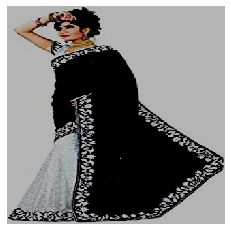

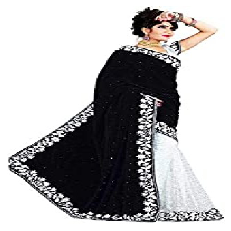

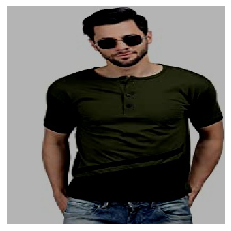

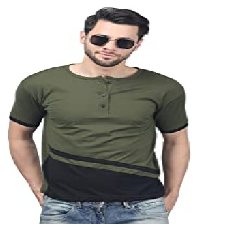

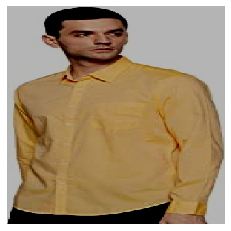

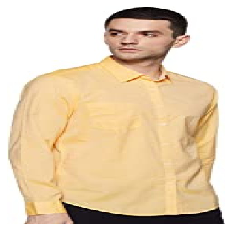

In [5]:
# Some Samples of Augmented Images
Saree_Aug='./Garments/Aug_img/Saree'
Tshirt_Aug='./Garments/Aug_img/Tshirt'
Shirt_Aug='./Garments/Aug_img/Shirt'

Dir_Aug=[Saree_Aug,Tshirt_Aug,Shirt_Aug]
for new_dir in Dir_Aug:
    k=listdir(new_dir)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(new_dir,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Preparing Data for Training

In [6]:
# Defining Dimensions for the image to be input and then loading the images
input_shape=(150,150,3)
img_width=150
img_height=150
nb_train_samples=480
nb_validation_samples=20
batch_size=16
epoch=20


In [7]:
# Training Data Generator( Data Augmentation on Training Images)

train_generator_augmented=ImageDataGenerator(rescale=1./255)
train_generator=train_generator_augmented.flow_from_directory(train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# Validation Data Generator
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 1440 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


# Defining the Model

In [8]:
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0

## In this step I have used for loops to roll up through all the optimizers and then display the model performance after training the model one by one for each optimizers for different learning rates.


*********************************Running model for:  sgd *******************************

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.2028 - accuracy: 0.3792
Epoch 00001: val_loss improved from inf to 1.11011, saving model to ./sgd(0.1).h5
30/30 [==============================] - 10s 341ms/step - loss: 1.2028 - accuracy: 0.3792 - val_loss: 1.1101 - val_accuracy: 0.3750 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1426 - accuracy: 0.3729
Epoch 00002: val_loss did not improve from 1.11011
30/30 [==============================] - 8s 252ms/step - loss: 1.1426 - accuracy: 0.3729 - val_loss: 1.1281 - val_accuracy: 0.3125 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1188 - accuracy: 0.3479
Epoch 00003: val_loss improved from 1.11011 to 1.10036, saving model to ./sgd(0.1).h5
30/30 [==============================] - 7s

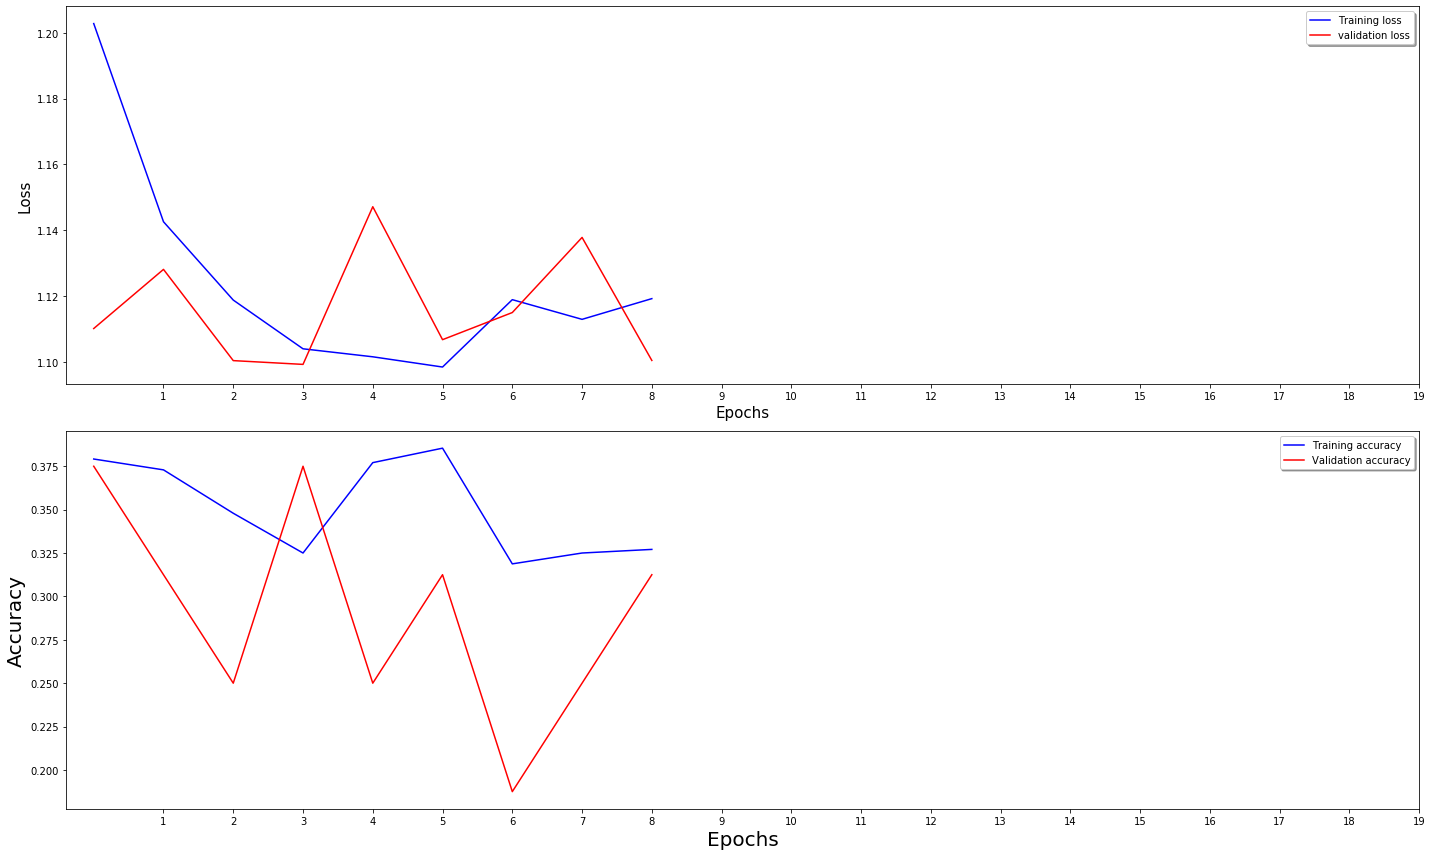

4/4 [==============================] - 0s 37ms/step - loss: 1.1070 - accuracy: 0.3333

*****************************************END******************************************************


*********************************Running model for:  nag *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1817 - accuracy: 0.3438
Epoch 00001: val_loss improved from inf to 1.05916, saving model to ./nag(0.1).h5
30/30 [==============================] - 7s 242ms/step - loss: 1.1817 - accuracy: 0.3438 - val_loss: 1.0592 - val_accuracy: 0.4375 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1051 - accuracy: 0.3542
Epoch 00002: val_loss did not improve from 1.05916
30/30 [==============================] - 7s 242ms/step - loss: 1.1051 - accuracy: 0.3542 - val_loss: 1.1017 - val_accuracy: 0.3125 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1060 - accuracy: 0.3438
Epoch 00003: val_lo

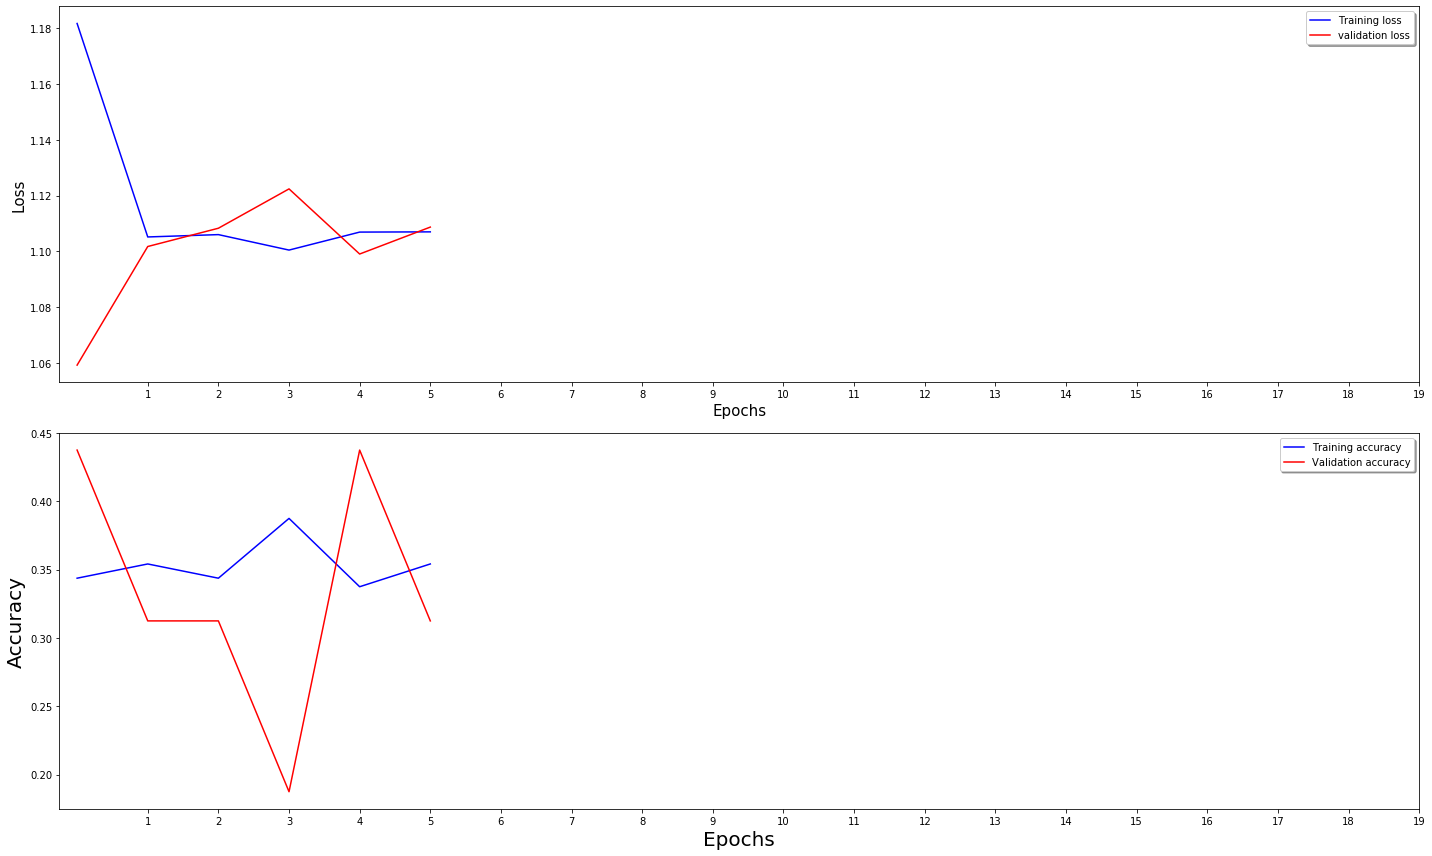

4/4 [==============================] - 0s 37ms/step - loss: 1.1119 - accuracy: 0.3333

*****************************************END******************************************************


*********************************Running model for:  rmsprop *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 22970816.0000 - accuracy: 0.3187
Epoch 00001: val_loss improved from inf to 1.08446, saving model to ./rmsprop(0.1).h5
30/30 [==============================] - 8s 252ms/step - loss: 22970816.0000 - accuracy: 0.3187 - val_loss: 1.0845 - val_accuracy: 0.3750 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1341 - accuracy: 0.3146
Epoch 00002: val_loss did not improve from 1.08446
30/30 [==============================] - 7s 249ms/step - loss: 1.1341 - accuracy: 0.3146 - val_loss: 1.0856 - val_accuracy: 0.2500 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1043 - accuracy: 0.35

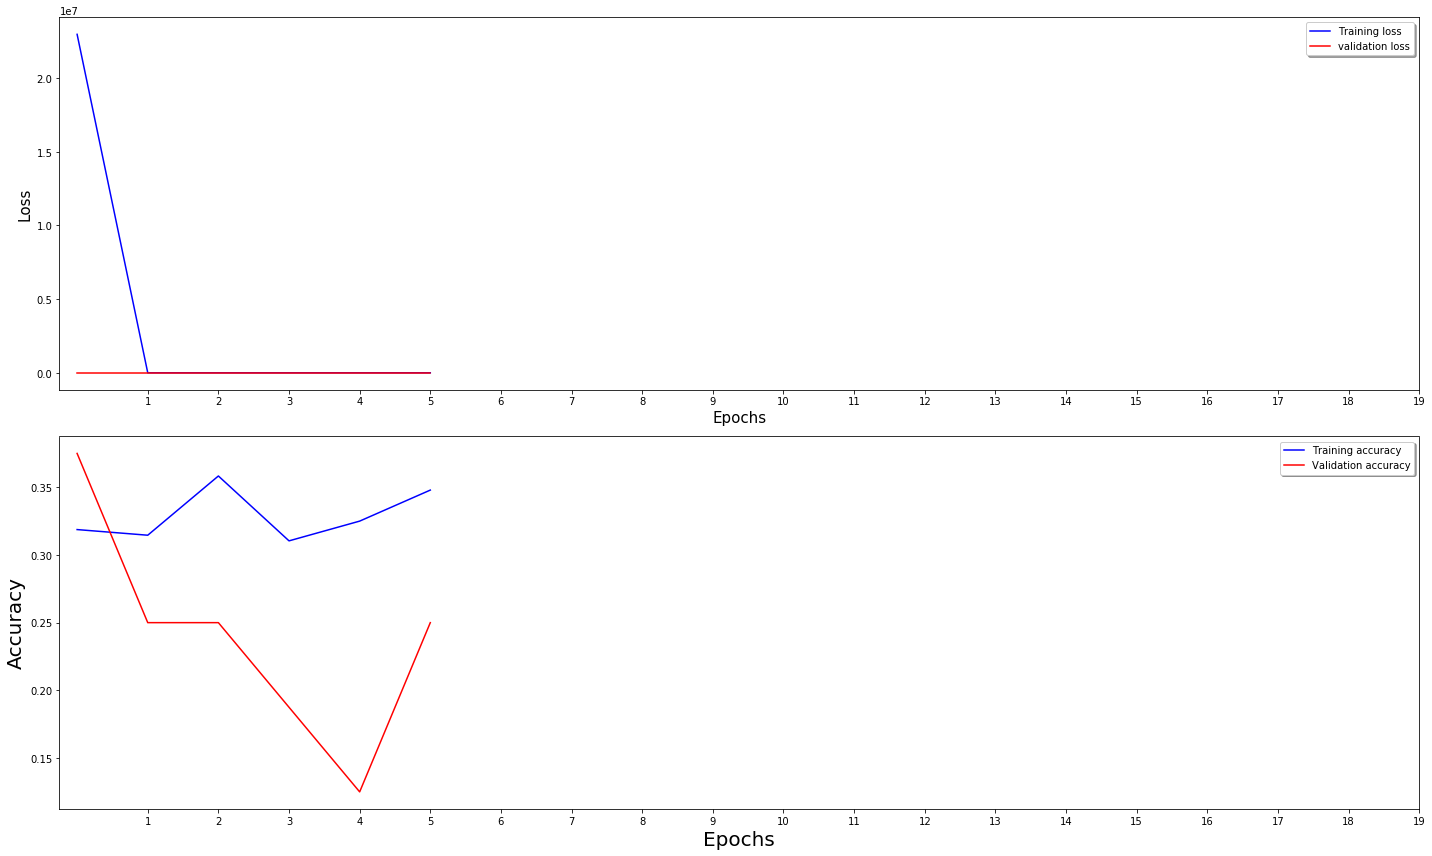

4/4 [==============================] - 0s 41ms/step - loss: 1.1165 - accuracy: 0.3333

*****************************************END******************************************************


*********************************Running model for:  adam *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 31860.5293 - accuracy: 0.3187
Epoch 00001: val_loss improved from inf to 1.16434, saving model to ./adam(0.1).h5
30/30 [==============================] - 8s 257ms/step - loss: 31860.5293 - accuracy: 0.3187 - val_loss: 1.1643 - val_accuracy: 0.2500 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1456 - accuracy: 0.3500
Epoch 00002: val_loss improved from 1.16434 to 1.11234, saving model to ./adam(0.1).h5
30/30 [==============================] - 7s 247ms/step - loss: 1.1456 - accuracy: 0.3500 - val_loss: 1.1123 - val_accuracy: 0.3125 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss:

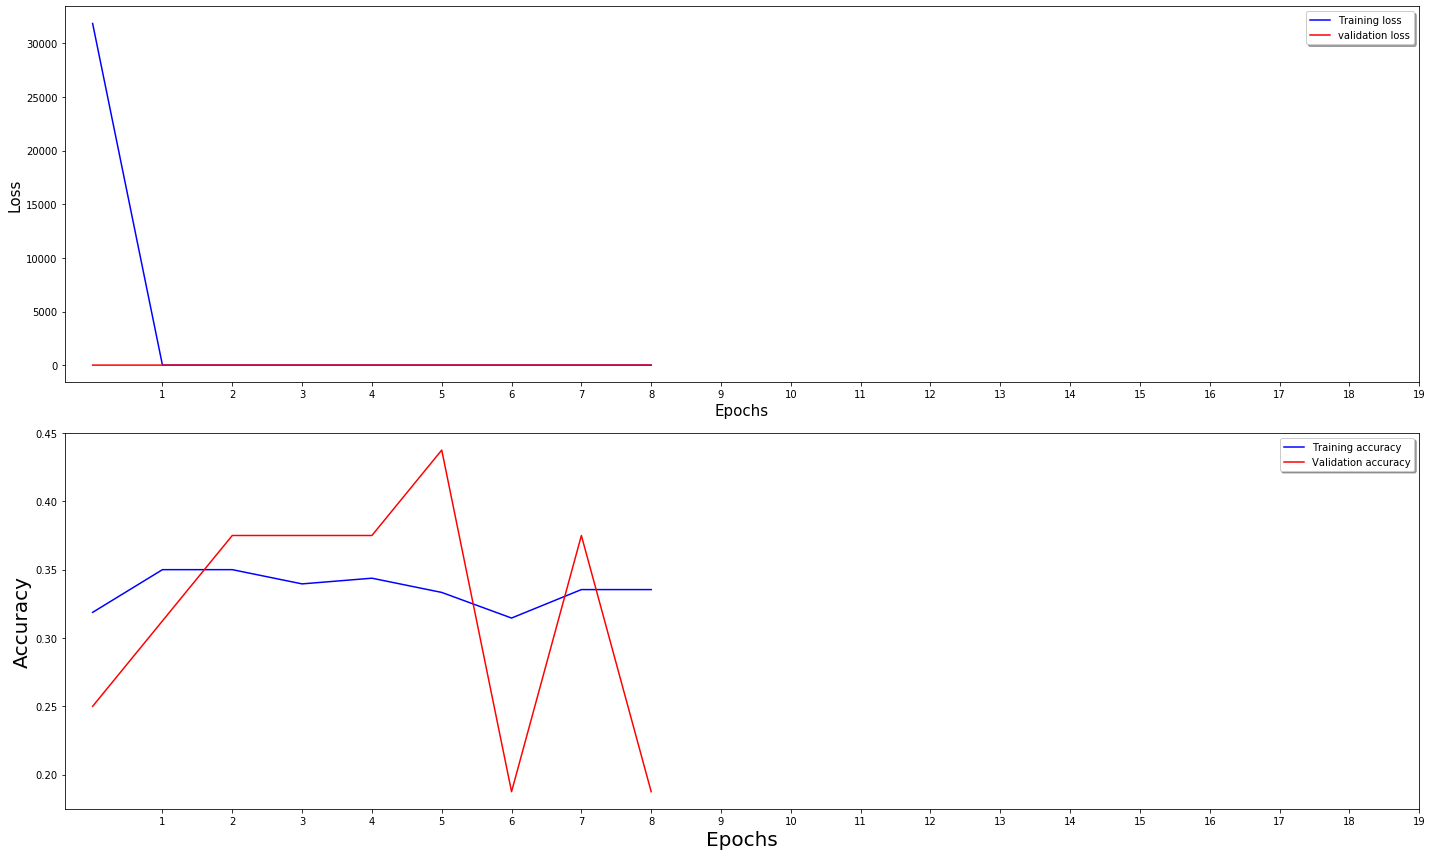

4/4 [==============================] - 0s 37ms/step - loss: 1.1080 - accuracy: 0.3333

*****************************************END******************************************************


*********************************Running model for:  nadam *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 24417.7070 - accuracy: 0.3854
Epoch 00001: val_loss improved from inf to 1.36132, saving model to ./nadam(0.1).h5
30/30 [==============================] - 8s 263ms/step - loss: 24417.7070 - accuracy: 0.3854 - val_loss: 1.3613 - val_accuracy: 0.2500 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1337 - accuracy: 0.3438
Epoch 00002: val_loss improved from 1.36132 to 1.14415, saving model to ./nadam(0.1).h5
30/30 [==============================] - 8s 264ms/step - loss: 1.1337 - accuracy: 0.3438 - val_loss: 1.1442 - val_accuracy: 0.3125 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - lo

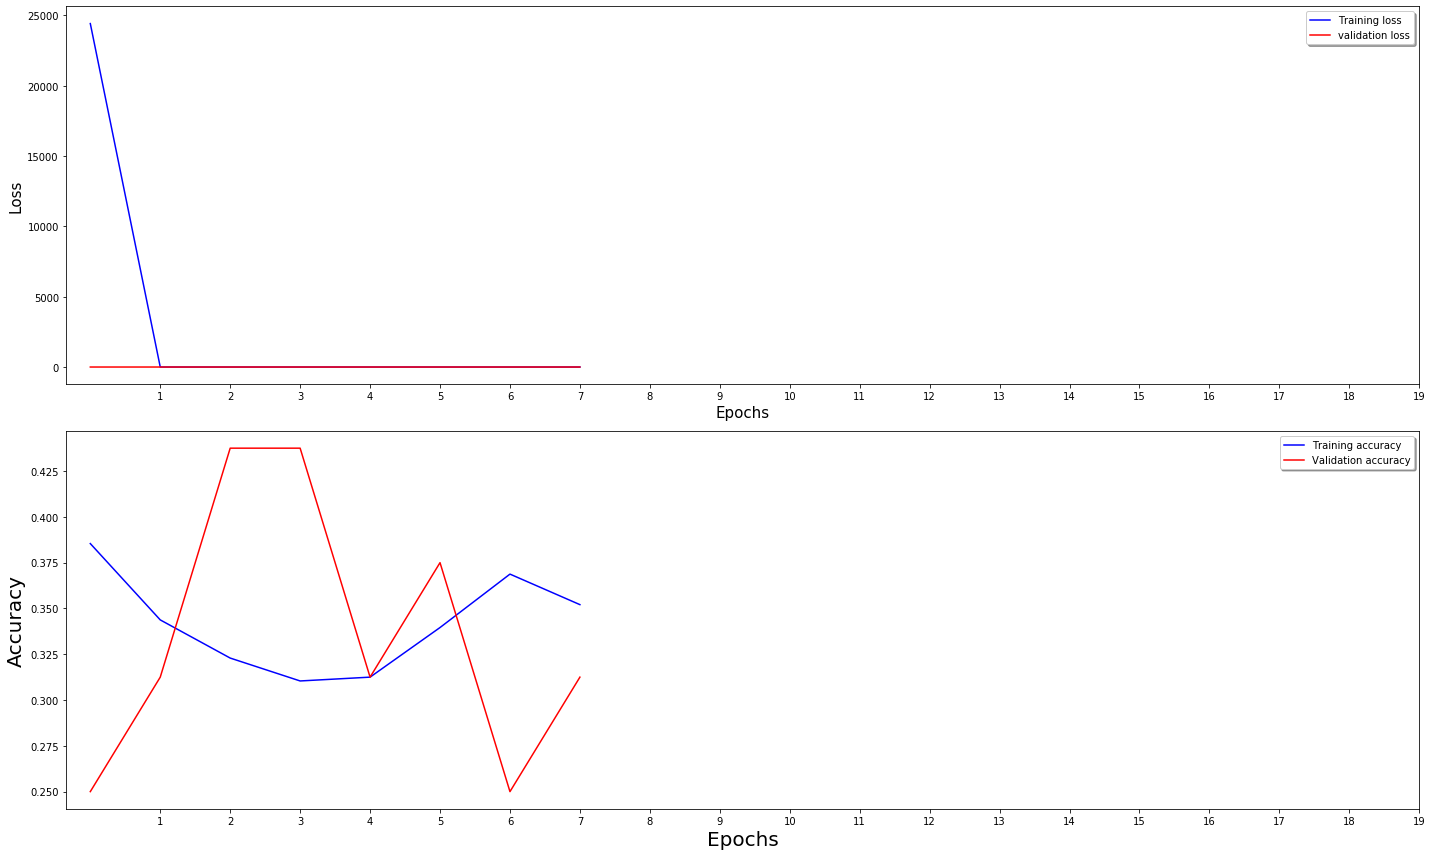

4/4 [==============================] - 0s 38ms/step - loss: 1.1085 - accuracy: 0.3333

*****************************************END******************************************************


*********************************Running model for:  sgd *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1200 - accuracy: 0.3292
Epoch 00001: val_loss improved from inf to 1.10893, saving model to ./sgd(0.01).h5
30/30 [==============================] - 7s 250ms/step - loss: 1.1200 - accuracy: 0.3292 - val_loss: 1.1089 - val_accuracy: 0.1875 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0663 - accuracy: 0.4271
Epoch 00002: val_loss improved from 1.10893 to 0.97205, saving model to ./sgd(0.01).h5
30/30 [==============================] - 7s 245ms/step - loss: 1.0663 - accuracy: 0.4271 - val_loss: 0.9721 - val_accuracy: 0.5625 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0455 -

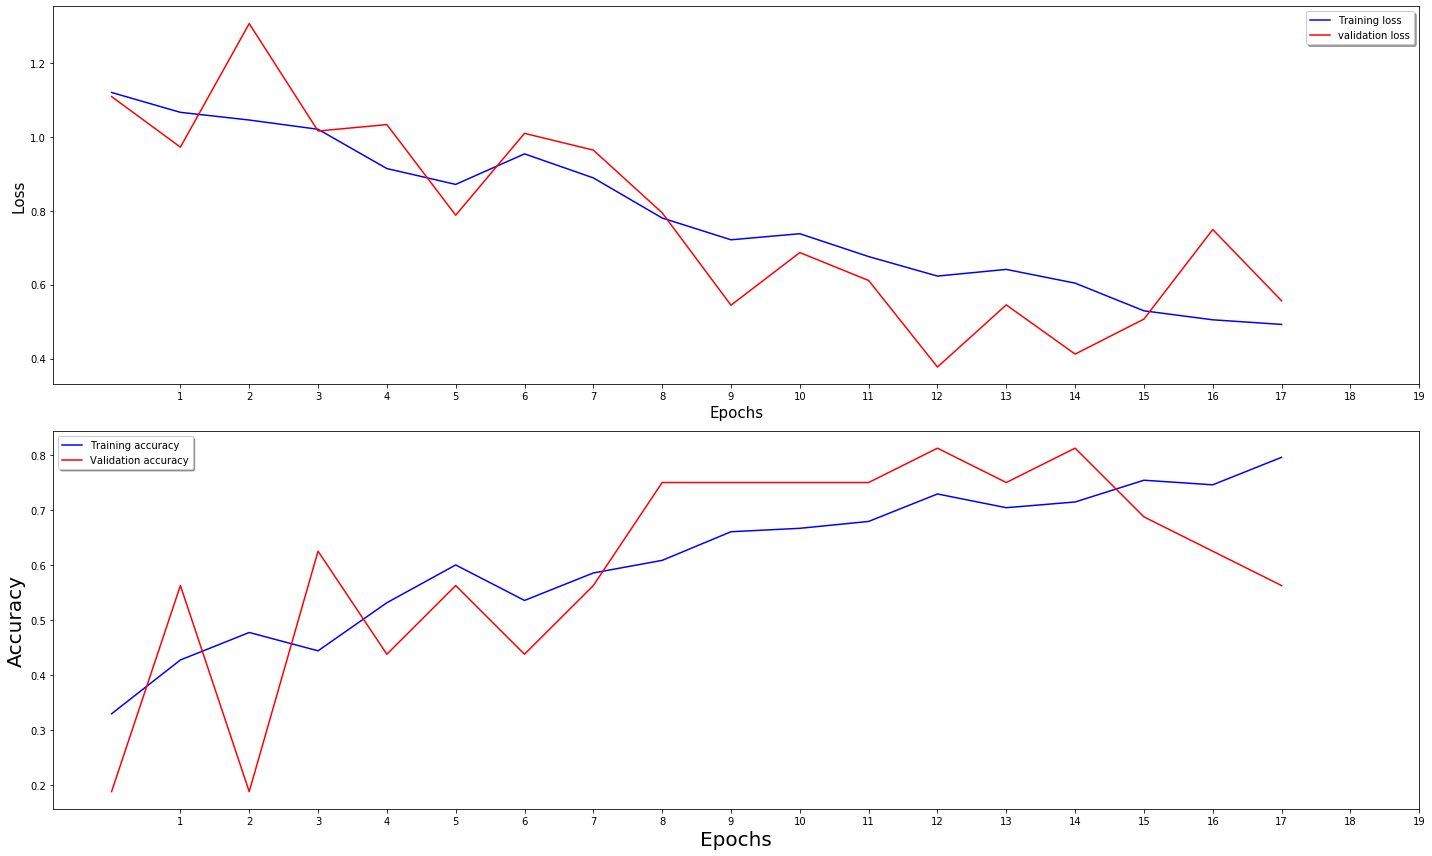

4/4 [==============================] - 0s 37ms/step - loss: 0.5530 - accuracy: 0.6833

*****************************************END******************************************************


*********************************Running model for:  nag *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1200 - accuracy: 0.3688
Epoch 00001: val_loss improved from inf to 1.08161, saving model to ./nag(0.01).h5
30/30 [==============================] - 8s 253ms/step - loss: 1.1200 - accuracy: 0.3688 - val_loss: 1.0816 - val_accuracy: 0.4375 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0834 - accuracy: 0.3958
Epoch 00002: val_loss improved from 1.08161 to 1.01713, saving model to ./nag(0.01).h5
30/30 [==============================] - 7s 246ms/step - loss: 1.0834 - accuracy: 0.3958 - val_loss: 1.0171 - val_accuracy: 0.5625 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 0.9917 -

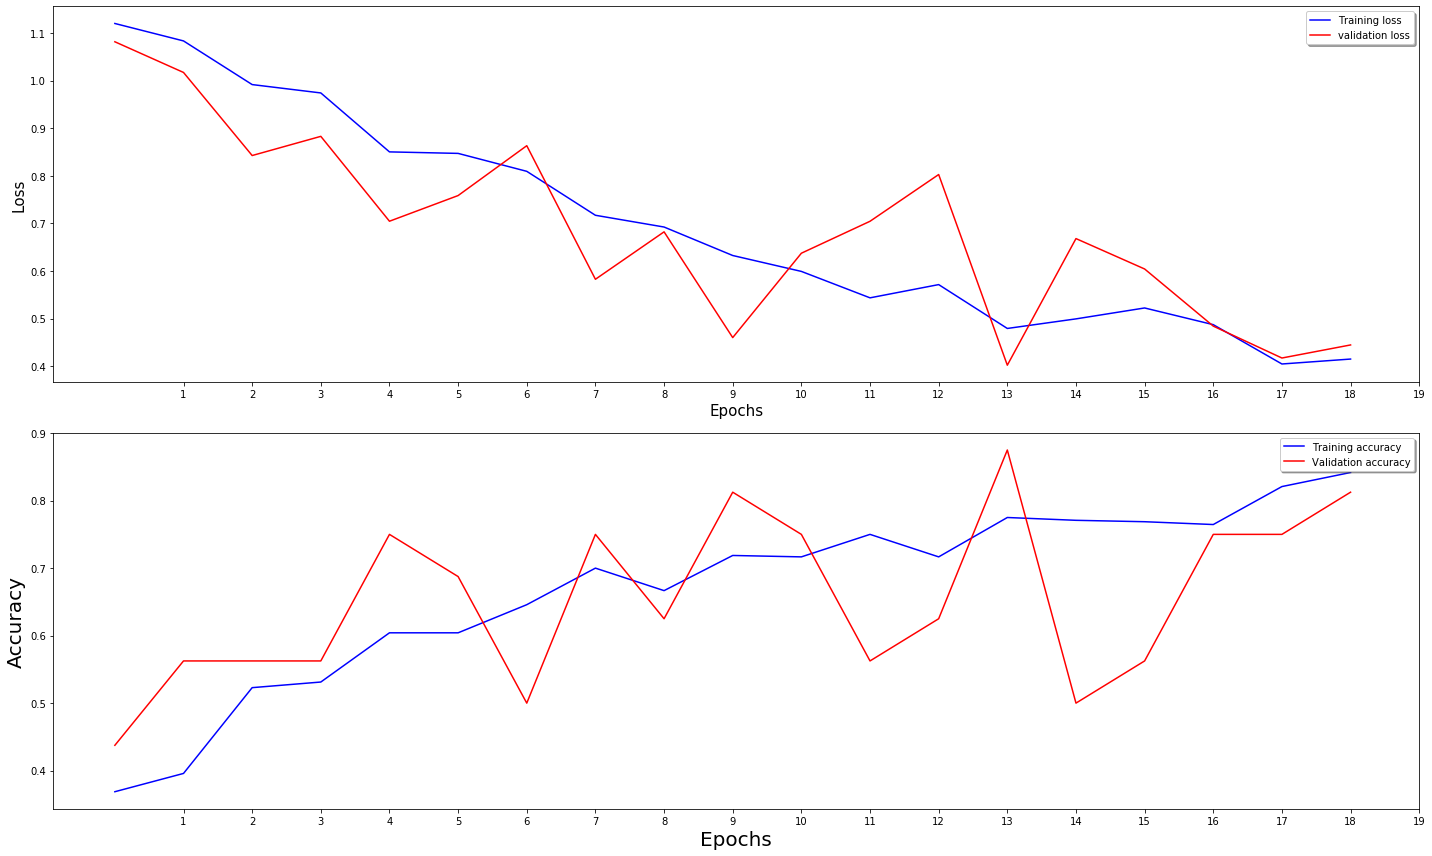

4/4 [==============================] - 0s 38ms/step - loss: 0.6246 - accuracy: 0.7000

*****************************************END******************************************************


*********************************Running model for:  rmsprop *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 39.8376 - accuracy: 0.3562
Epoch 00001: val_loss improved from inf to 1.09927, saving model to ./rmsprop(0.01).h5
30/30 [==============================] - 8s 255ms/step - loss: 39.8376 - accuracy: 0.3562 - val_loss: 1.0993 - val_accuracy: 0.4375 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1080 - accuracy: 0.3063
Epoch 00002: val_loss improved from 1.09927 to 1.09339, saving model to ./rmsprop(0.01).h5
30/30 [==============================] - 8s 252ms/step - loss: 1.1080 - accuracy: 0.3063 - val_loss: 1.0934 - val_accuracy: 0.4375 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - 

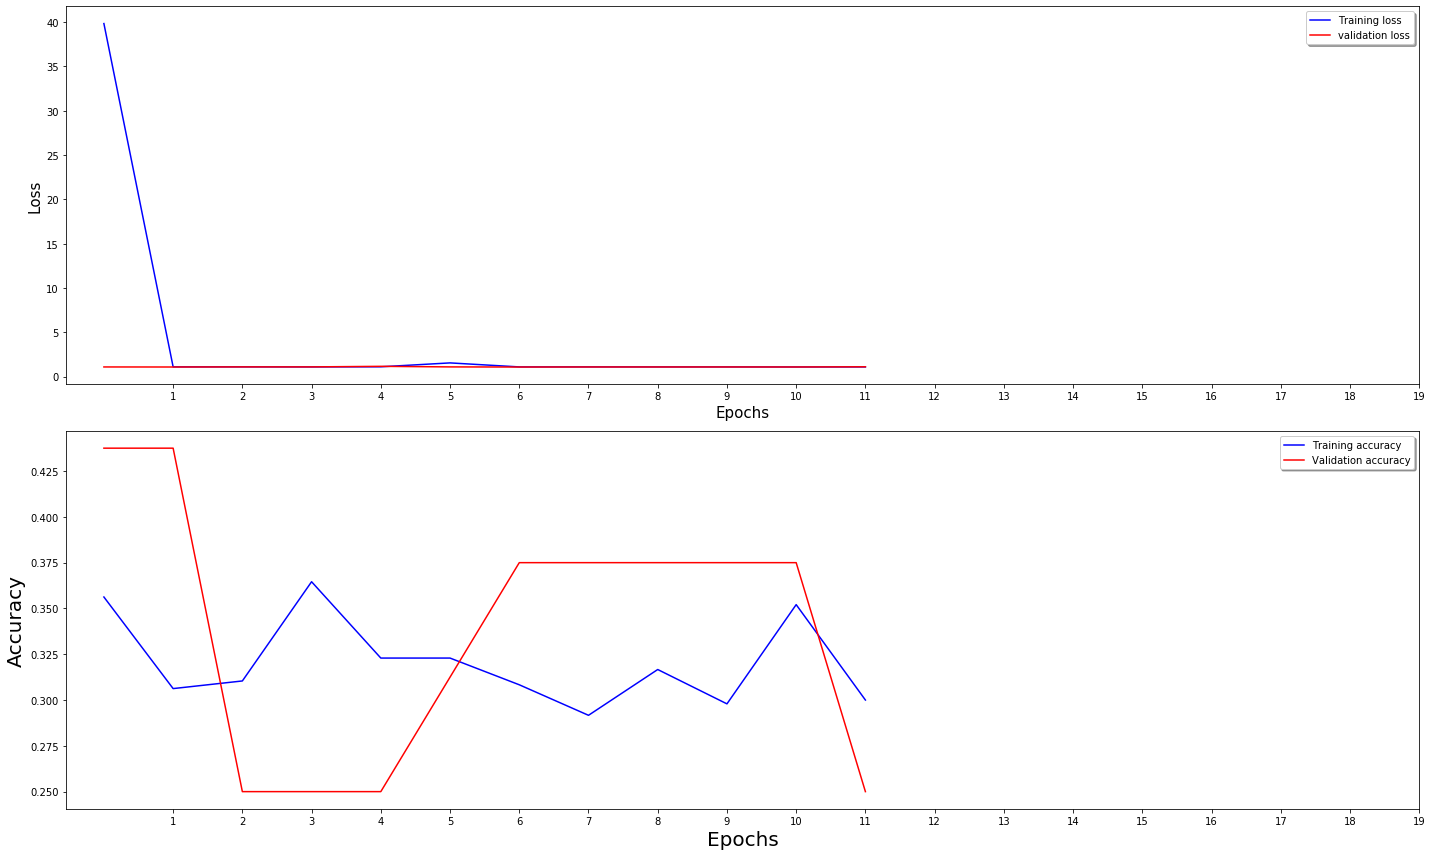

4/4 [==============================] - 0s 43ms/step - loss: 1.0992 - accuracy: 0.3333

*****************************************END******************************************************


*********************************Running model for:  adam *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 2.8822 - accuracy: 0.3354
Epoch 00001: val_loss improved from inf to 1.13239, saving model to ./adam(0.01).h5
30/30 [==============================] - 7s 249ms/step - loss: 2.8822 - accuracy: 0.3354 - val_loss: 1.1324 - val_accuracy: 0.3125 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0991 - accuracy: 0.3500
Epoch 00002: val_loss improved from 1.13239 to 1.08966, saving model to ./adam(0.01).h5
30/30 [==============================] - 7s 246ms/step - loss: 1.0991 - accuracy: 0.3500 - val_loss: 1.0897 - val_accuracy: 0.3750 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.096

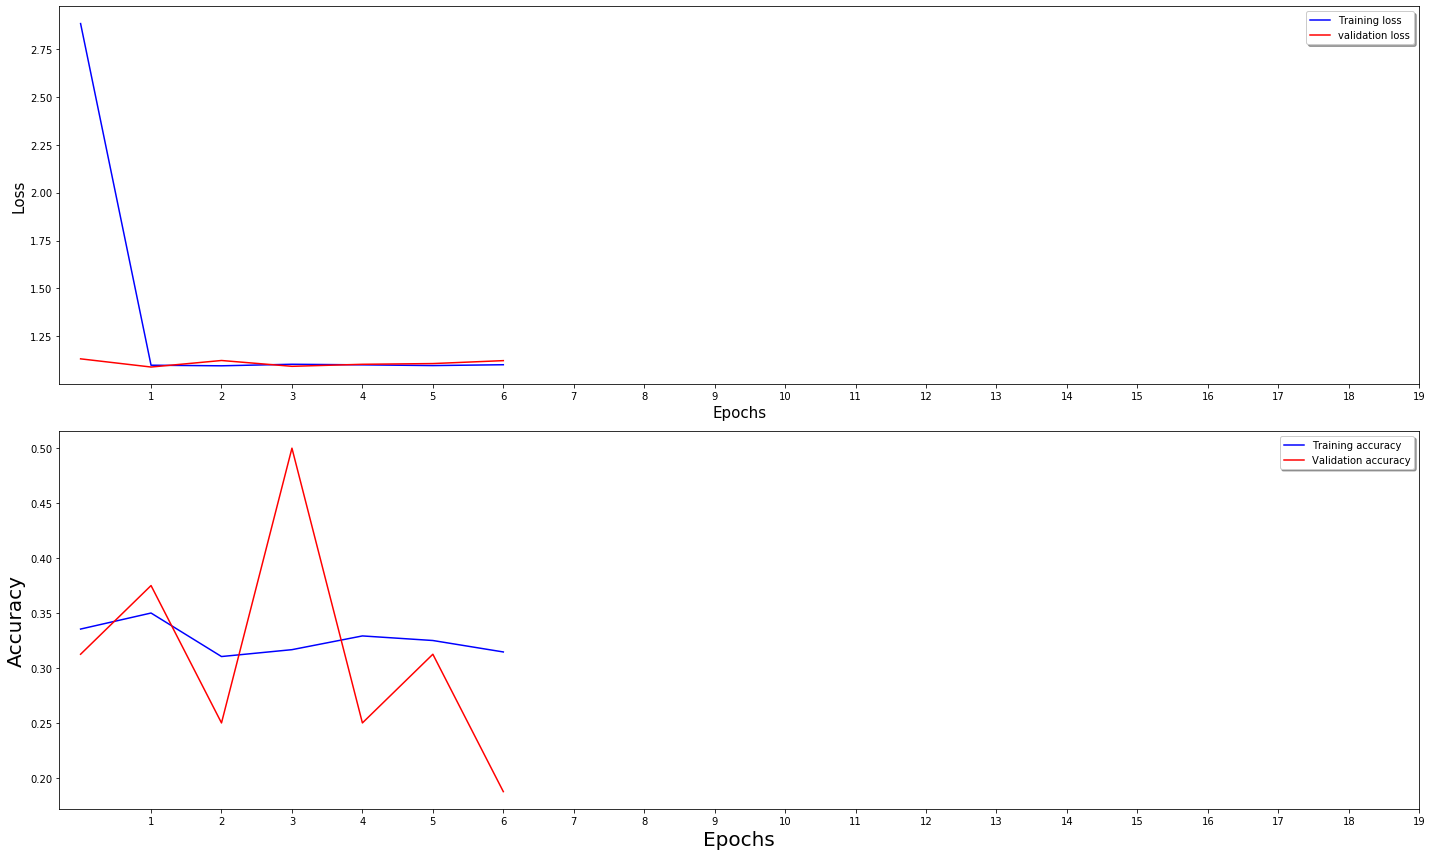

4/4 [==============================] - 0s 38ms/step - loss: 1.1005 - accuracy: 0.3333

*****************************************END******************************************************


*********************************Running model for:  nadam *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 2.8343 - accuracy: 0.3187
Epoch 00001: val_loss improved from inf to 1.11534, saving model to ./nadam(0.01).h5
30/30 [==============================] - 8s 271ms/step - loss: 2.8343 - accuracy: 0.3187 - val_loss: 1.1153 - val_accuracy: 0.3125 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1014 - accuracy: 0.3250
Epoch 00002: val_loss improved from 1.11534 to 1.10302, saving model to ./nadam(0.01).h5
30/30 [==============================] - 8s 264ms/step - loss: 1.1014 - accuracy: 0.3250 - val_loss: 1.1030 - val_accuracy: 0.2500 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.

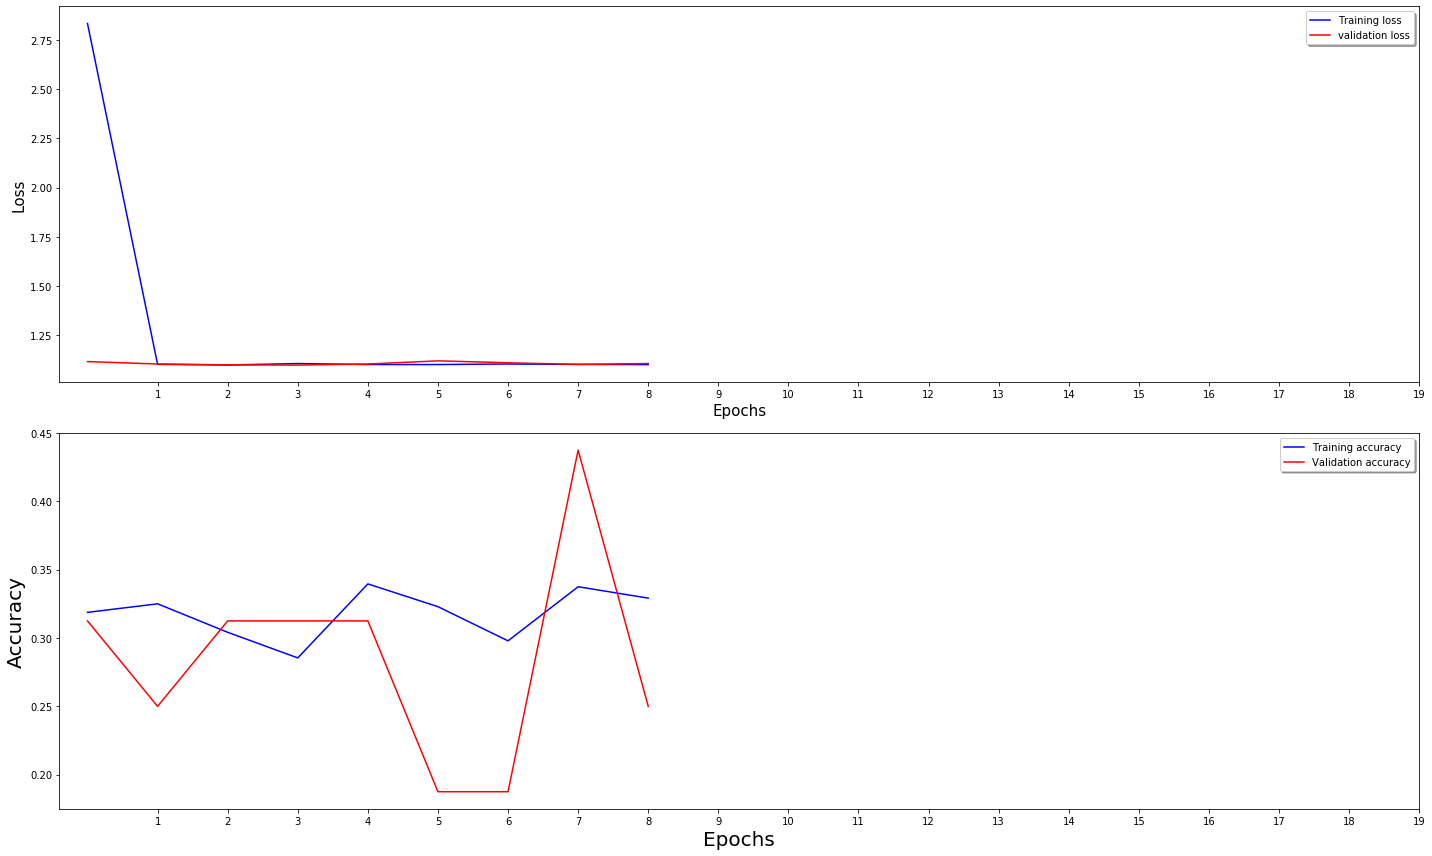

4/4 [==============================] - 0s 39ms/step - loss: 1.0985 - accuracy: 0.3333

*****************************************END******************************************************


*********************************Running model for:  sgd *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1036 - accuracy: 0.3667
Epoch 00001: val_loss improved from inf to 1.10915, saving model to ./sgd(0.001).h5
30/30 [==============================] - 8s 250ms/step - loss: 1.1036 - accuracy: 0.3667 - val_loss: 1.1091 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1131 - accuracy: 0.3667
Epoch 00002: val_loss improved from 1.10915 to 1.08815, saving model to ./sgd(0.001).h5
30/30 [==============================] - 7s 248ms/step - loss: 1.1131 - accuracy: 0.3667 - val_loss: 1.0881 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0888

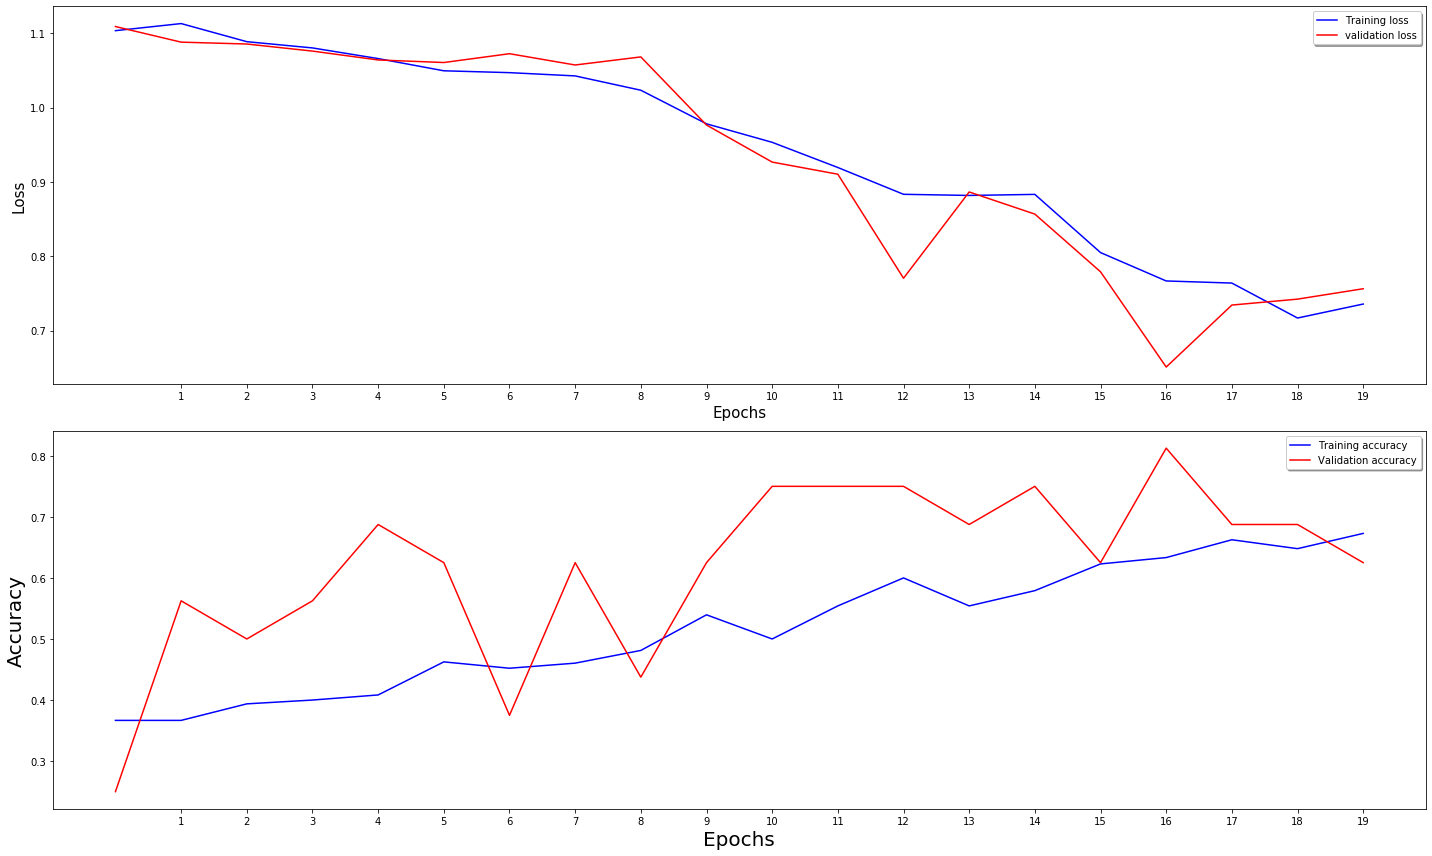

4/4 [==============================] - 0s 44ms/step - loss: 0.6954 - accuracy: 0.6667

*****************************************END******************************************************


*********************************Running model for:  nag *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1684 - accuracy: 0.3375
Epoch 00001: val_loss improved from inf to 1.09262, saving model to ./nag(0.001).h5
30/30 [==============================] - 8s 252ms/step - loss: 1.1684 - accuracy: 0.3375 - val_loss: 1.0926 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0956 - accuracy: 0.3750
Epoch 00002: val_loss improved from 1.09262 to 1.09034, saving model to ./nag(0.001).h5
30/30 [==============================] - 7s 250ms/step - loss: 1.0956 - accuracy: 0.3750 - val_loss: 1.0903 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0883

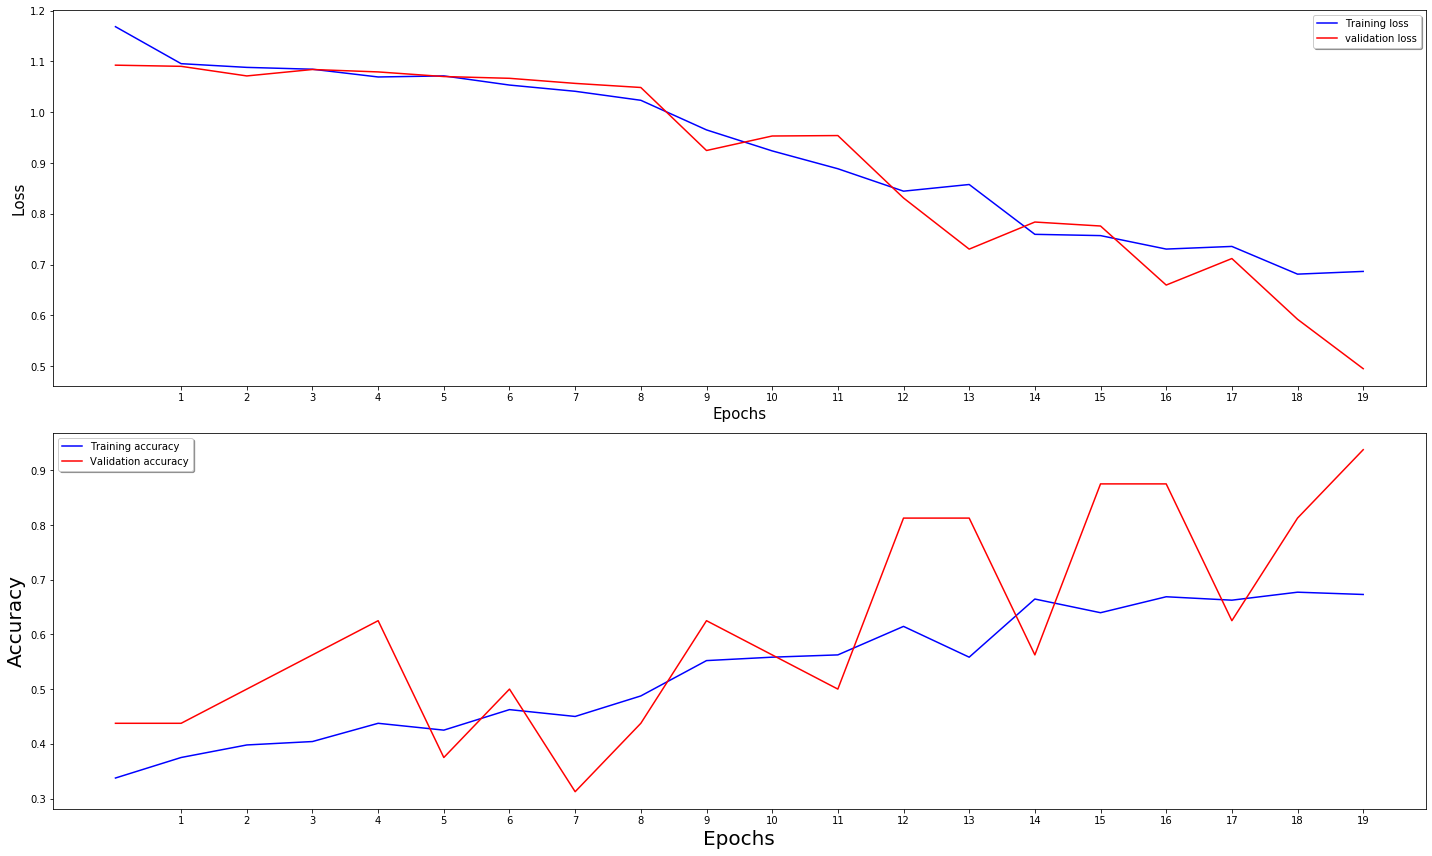

4/4 [==============================] - 0s 37ms/step - loss: 0.6202 - accuracy: 0.8000

*****************************************END******************************************************


*********************************Running model for:  rmsprop *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1995 - accuracy: 0.3792
Epoch 00001: val_loss improved from inf to 1.09090, saving model to ./rmsprop(0.001).h5
30/30 [==============================] - 8s 262ms/step - loss: 1.1995 - accuracy: 0.3792 - val_loss: 1.0909 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0445 - accuracy: 0.5250
Epoch 00002: val_loss improved from 1.09090 to 0.91023, saving model to ./rmsprop(0.001).h5
30/30 [==============================] - 8s 256ms/step - loss: 1.0445 - accuracy: 0.5250 - val_loss: 0.9102 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - 

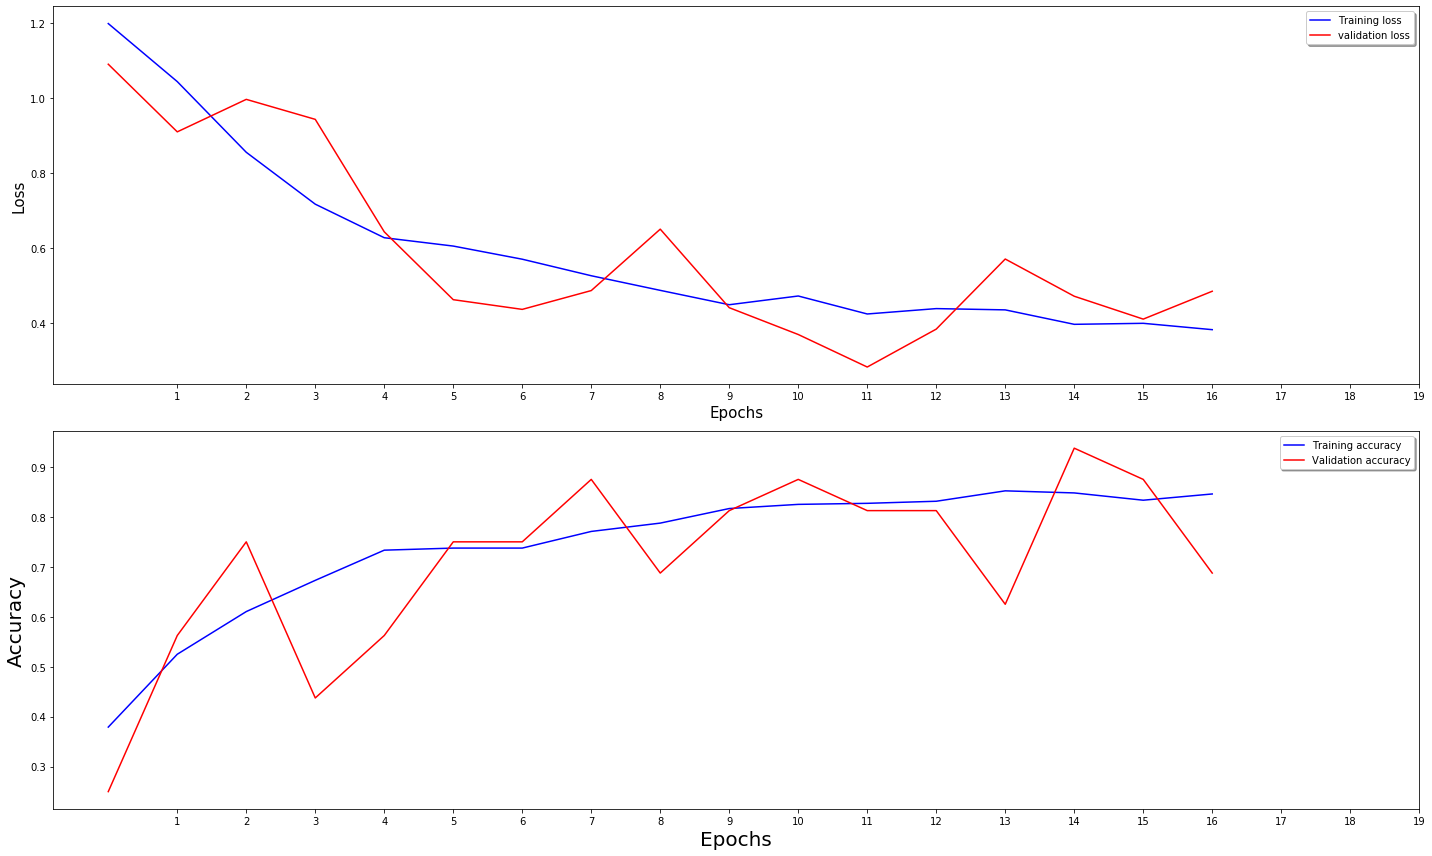

4/4 [==============================] - 0s 40ms/step - loss: 0.4095 - accuracy: 0.7667

*****************************************END******************************************************


*********************************Running model for:  adam *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1637 - accuracy: 0.3875
Epoch 00001: val_loss improved from inf to 1.08779, saving model to ./adam(0.001).h5
30/30 [==============================] - 8s 255ms/step - loss: 1.1637 - accuracy: 0.3875 - val_loss: 1.0878 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0910 - accuracy: 0.3833
Epoch 00002: val_loss improved from 1.08779 to 1.07194, saving model to ./adam(0.001).h5
30/30 [==============================] - 8s 252ms/step - loss: 1.0910 - accuracy: 0.3833 - val_loss: 1.0719 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 0.9

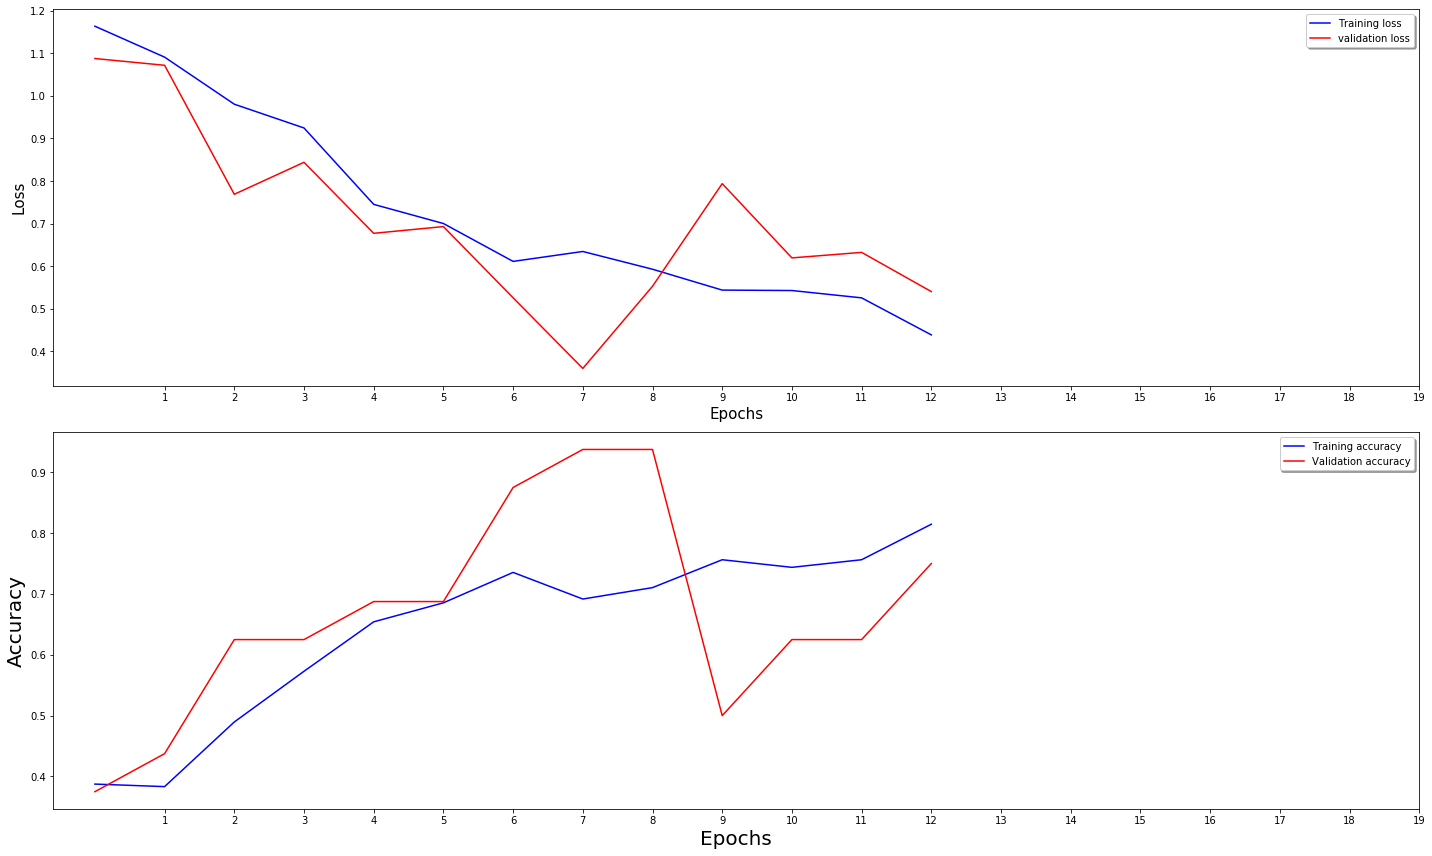

4/4 [==============================] - 0s 39ms/step - loss: 0.4929 - accuracy: 0.7667

*****************************************END******************************************************


*********************************Running model for:  nadam *******************************

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.3108 - accuracy: 0.4021
Epoch 00001: val_loss improved from inf to 1.08150, saving model to ./nadam(0.001).h5
30/30 [==============================] - 8s 271ms/step - loss: 1.3108 - accuracy: 0.4021 - val_loss: 1.0815 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0014 - accuracy: 0.5146
Epoch 00002: val_loss improved from 1.08150 to 0.73545, saving model to ./nadam(0.001).h5
30/30 [==============================] - 8s 267ms/step - loss: 1.0014 - accuracy: 0.5146 - val_loss: 0.7355 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 

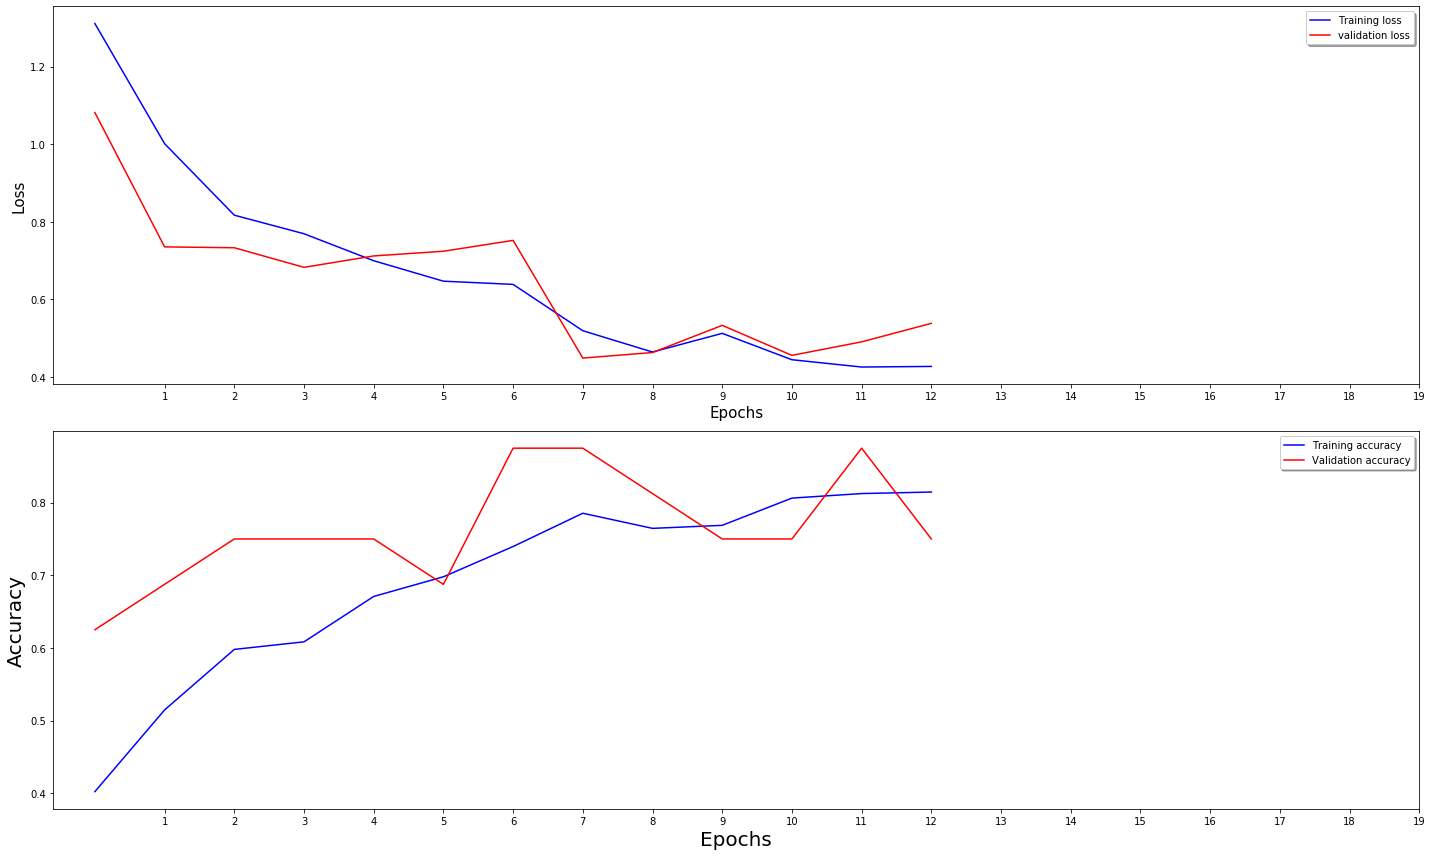

4/4 [==============================] - 0s 42ms/step - loss: 0.4419 - accuracy: 0.8333

*****************************************END******************************************************



In [9]:
lr=[0.1,0.01,0.001]
name=[]
Eval={}

for i,a in enumerate(lr):

        optimizers={"sgd":keras.optimizers.SGD(learning_rate=a,momentum=0.9),
                    "nag":keras.optimizers.SGD(learning_rate=a,momentum=0.9,nesterov=True),
                    "rmsprop":keras.optimizers.RMSprop(lr =a,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False,),
                    "adam":keras.optimizers.Adam(learning_rate=a,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=True),
                    "nadam":keras.optimizers.Nadam(learning_rate=a, beta_1=0.9, beta_2=0.999, epsilon=1e-07,)
                   }
        for opt in optimizers:
            print("\n*********************************Running model for: ",opt,"*******************************\n")
            model=Sequential()

            # First convolution layer
            model.add(Conv2D(32,(3,3),input_shape=input_shape))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(0.25))
 
            # Second convolution layer
            model.add(Conv2D(32,(3,3)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(0.25))

            # Third convolution layer
            model.add(Conv2D(64,(3,3)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(0.25))

            # Fourth convolution layer
            model.add(Conv2D(64,(3,3)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(0.25))


            model.add(Flatten())
            model.add(Dense(512))
            model.add(Activation('relu'))
            model.add(Dropout(0.5))
            model.add(Dense(3))
            model.add(Activation('softmax'))

            model.compile(loss='categorical_crossentropy',optimizer = optimizers.get("{}".format(opt)),metrics=['accuracy'])

            ## EarlyStopping and ModelCheckpoint

            checkpoint = ModelCheckpoint('./{}({}).h5'.format(opt,a),
                                      monitor="val_loss",
                                      mode="min",
                                      save_best_only = True,
                                      verbose=1)

            earlystop = EarlyStopping(monitor = 'val_loss', 
                                  min_delta = 0, 
                                  patience = 5,
                                  verbose = 1,
                                  restore_best_weights = True)

            reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                      factor = 0.2,
                                      patience = 5,
                                      verbose = 1,
                                      min_delta = 0.0001)
            # we put our call backs into a callback list
            callbacks = [earlystop, checkpoint, reduce_lr]
            
            # Training our model
            history = model.fit_generator(
                                      train_generator, 
                                      epochs=epoch,
                                      validation_data=validation_generator,
                                      validation_steps=nb_validation_samples//batch_size,
                                      steps_per_epoch=nb_train_samples//batch_size,
                                      callbacks=callbacks
  
                                      )
            # Visualizing  Training
            import matplotlib.pyplot as plt
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
            ax1.plot(history.history['loss'], color='b', label="Training loss")
            ax1.plot(history.history['val_loss'], color='r', label="validation loss")
            ax1.set_xticks(np.arange(1, epoch, 1),)
            ax1.set_xlabel('Epochs' ,fontsize=15)
            ax1.set_ylabel('Loss' ,fontsize=15)
            ax1.legend(loc='best', shadow=True)

            ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
            ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
            ax2.set_xlabel('Epochs' ,fontsize=20)
            ax2.set_ylabel('Accuracy' ,fontsize=20)
            ax2.set_xticks(np.arange(1, epoch, 1))

            ax2.legend(loc='best', shadow=True)
            plt.tight_layout()
            plt.show()
            # Evaluating our model performance
            r=model.evaluate(validation_generator)
            k='{}({})_evaluate'.format(opt,a)
            n=name.append('{}({}).h5'.format(opt,a))
            Eval[k]=r
            print("\n*****************************************END******************************************************\n")


## Inspecting the names of best saved model for each optimizers.

In [10]:
# Saved_ model names
name

['sgd(0.1).h5',
 'nag(0.1).h5',
 'rmsprop(0.1).h5',
 'adam(0.1).h5',
 'nadam(0.1).h5',
 'sgd(0.01).h5',
 'nag(0.01).h5',
 'rmsprop(0.01).h5',
 'adam(0.01).h5',
 'nadam(0.01).h5',
 'sgd(0.001).h5',
 'nag(0.001).h5',
 'rmsprop(0.001).h5',
 'adam(0.001).h5',
 'nadam(0.001).h5']

In [11]:
# Dictionary in which all the evaluation results are stored 
Eval

{'sgd(0.1)_evaluate': [1.1070010662078857, 0.3333333432674408],
 'nag(0.1)_evaluate': [1.1118779182434082, 0.3333333432674408],
 'rmsprop(0.1)_evaluate': [1.1165269613265991, 0.3333333432674408],
 'adam(0.1)_evaluate': [1.10802161693573, 0.3333333432674408],
 'nadam(0.1)_evaluate': [1.1085015535354614, 0.3333333432674408],
 'sgd(0.01)_evaluate': [0.5529688596725464, 0.6833333373069763],
 'nag(0.01)_evaluate': [0.6245701313018799, 0.699999988079071],
 'rmsprop(0.01)_evaluate': [1.0991870164871216, 0.3333333432674408],
 'adam(0.01)_evaluate': [1.1004643440246582, 0.3333333432674408],
 'nadam(0.01)_evaluate': [1.0984779596328735, 0.3333333432674408],
 'sgd(0.001)_evaluate': [0.6954123377799988, 0.6666666865348816],
 'nag(0.001)_evaluate': [0.6202179193496704, 0.800000011920929],
 'rmsprop(0.001)_evaluate': [0.4095239043235779, 0.7666666507720947],
 'adam(0.001)_evaluate': [0.49288350343704224, 0.7666666507720947],
 'nadam(0.001)_evaluate': [0.44193971157073975, 0.8333333134651184]}

In [12]:
# seperating the loss and accuracy values for each saved model
val=list(Eval.values())
val
Loss=[] 
Accuracy=[]
for i in val:
    Loss.append(i[0])
    Accuracy.append(i[1])

# Evaluation results for each saved model.

In [13]:
# Data frame of evaluation results
df=pd.DataFrame({"Models(Learning Rate)":name,"Accuracy":Accuracy,"Loss":Loss})
df.style.background_gradient(cmap='YlGnBu')

,Models(Learning Rate),Accuracy,Loss
0,sgd(0.1).h5,0.333333,1.107
1,nag(0.1).h5,0.333333,1.11188
2,rmsprop(0.1).h5,0.333333,1.11653
3,adam(0.1).h5,0.333333,1.10802
4,nadam(0.1).h5,0.333333,1.1085
5,sgd(0.01).h5,0.683333,0.552969
6,nag(0.01).h5,0.7,0.62457
7,rmsprop(0.01).h5,0.333333,1.09919
8,adam(0.01).h5,0.333333,1.10046
9,nadam(0.01).h5,0.333333,1.09848


In [14]:
# As we can see that there are 3 classes for the 90 test images
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Saving the best model for each optimizer

In [16]:
# Lets load our model
saved_model_sgd = load_model('sgd(0.01).h5')
saved_model_sgdnag = load_model('nag(0.001).h5')

saved_model_rms = load_model('rmsprop(0.001).h5')
saved_model_adam = load_model('adam(0.001).h5')
saved_model_Nadam = load_model('nadam(0.001).h5')

save_models=[saved_model_sgd,saved_model_sgdnag,saved_model_rms,saved_model_adam,saved_model_Nadam]

# Predicting the Images

In [17]:
# Predicted samples of the test images
test_Saree='./Garments/test/Saree'
test_Shirt='./Garments/test/Shirt'
test_Tshirt='./Garments/test/Tshirt'

res = pd.DataFrame()


res['Actual_Label']=validation_generator.classes
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})

test_Dir=[test_Saree,test_Shirt,test_Tshirt,]
Img_name=[]
for h in test_Dir:

    for n in listdir(h):
        Img_name.append(n)
res["Image Name"]=Img_name

for ind,mod in enumerate(save_models):
    Predicted_class=[]
    
    for test_dir in test_Dir:
        for i in listdir(test_dir):            
            img= image.load_img('{}/{}'.format(test_dir,i))                         
            test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(150, 150))
            test_image = image.img_to_array(test_image)
            test_image = np.expand_dims(test_image, axis=0)                 
            result = mod.predict(test_image)
            final=np.argmax(result, axis=1)[0]
            if final==0:       
                Predicted_class.append("Saree")
            elif final==1:             
                Predicted_class.append("Shirt")
            elif final==2:              
                Predicted_class.append("Tshirt")
    
                
    if ind==0:
        res['Predicted_Label_sgd']=Predicted_class
    elif ind==1:
        res['Predicted_Label_sgdnag']=Predicted_class 
    elif ind==2:
        res['Predicted_Label_rms']=Predicted_class     
    elif ind==3:
        res['Predicted_Label_adam']=Predicted_class    
    elif ind==4:
        res['Predicted_Label_Nadam']=Predicted_class        
                
res

,Actual_Label,Image Name,Predicted_Label_sgd,Predicted_Label_sgdnag,Predicted_Label_rms,Predicted_Label_adam,Predicted_Label_Nadam
0,Saree,Saree_img_231.jpeg,Saree,Saree,Saree,Saree,Saree
1,Saree,Saree_img_232.jpeg,Saree,Saree,Saree,Saree,Saree
2,Saree,Saree_img_233.jpeg,Saree,Saree,Saree,Saree,Saree
3,Saree,Saree_img_234.jpeg,Saree,Saree,Saree,Saree,Saree
4,Saree,Saree_img_236.jpeg,Saree,Saree,Saree,Saree,Saree
5,Saree,Saree_img_237.jpeg,Saree,Saree,Saree,Saree,Saree
6,Saree,Saree_img_239.jpeg,Saree,Saree,Saree,Saree,Saree
7,Saree,Saree_img_242.jpeg,Saree,Saree,Saree,Saree,Saree
8,Saree,Saree_img_243.jpeg,Saree,Saree,Saree,Saree,Saree
9,Saree,Saree_img_244.jpeg,Saree,Saree,Saree,Saree,Saree


# Confusion matrix Visualization for each optimizers

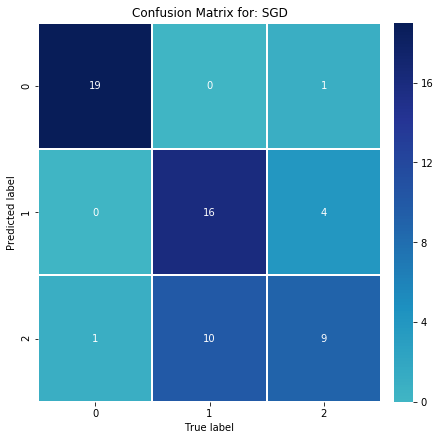

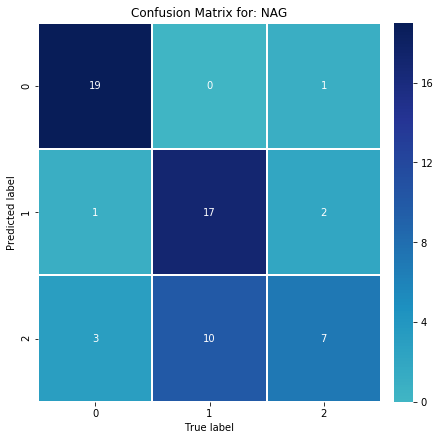

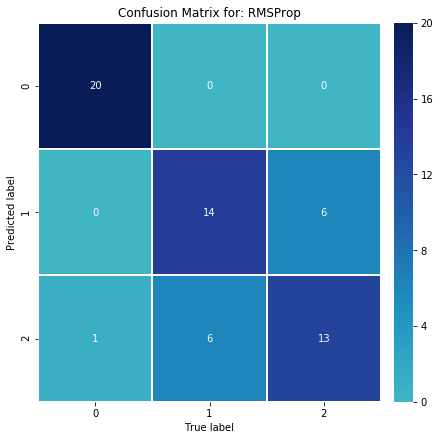

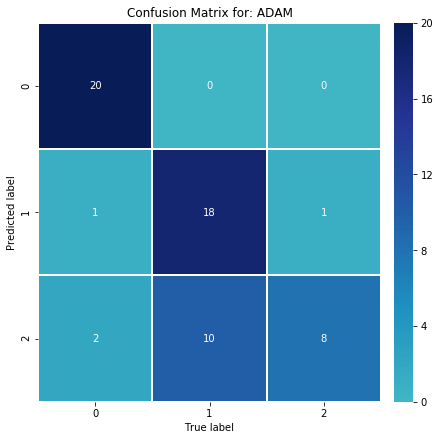

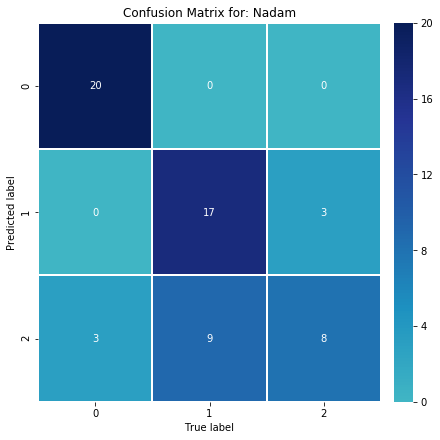

In [18]:
# show the confusion matrix of our predictions
import matplotlib
from sklearn.metrics import confusion_matrix
import seaborn as sns
title=["SGD","NAG","RMSProp","ADAM","Nadam"]
for ind, mod in enumerate(title):
    if ind==0:
        y_pred = res["Predicted_Label_sgd"]
       
    elif ind==1:
        y_pred = res["Predicted_Label_sgdnag"]
       
    elif ind==2:
        y_pred = res["Predicted_Label_rms"]
      
    elif ind==3:
        y_pred = res["Predicted_Label_adam"]
      
    elif ind==4:
        y_pred = res["Predicted_Label_Nadam"]
        
    y_test = res['Actual_Label']
    #class_names = validation_generator.class_indices.keys()
    

    fig, ax =plt.subplots(figsize=(6,6), constrained_layout=True)
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,
                linewidths=1,
                center=0,
                cmap='YlGnBu')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.title("Confusion Matrix for: {}".format(mod))
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)